In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import math
from random import randint
from matplotlib.colors import ListedColormap, Normalize

In [46]:
n = int(input("Enter the size of the grid: "))
steps = int(input("Enter the steps to be moved: "))
theta = float(input("Enter the theta: "))
ucb = float(input("Upper Confidence Bound parameter for Monte-carlo Tree Search planning: "))

Enter the size of the grid: 10
Enter the steps to be moved: 20
Enter the theta: 0.75
Upper Confidence Bound parameter for Monte-carlo Tree Search planning: 0.5


In [167]:
class Environment:
    
    def __init__(self, ax, n, theta, ucb):
        self.n = n
        self.theta = theta
        self.ucb = ucb
        self.grid = np.zeros((n,n))
        self.dist = np.zeros((n,n))
        self.line, = ax.plot([],[])
        self.ax = ax
        self.ax.hlines(y=np.arange(0, n)+0.5, xmin=np.full(n, 0)-0.5,
                       xmax=np.full(n, n)-0.5, color="black")
        self.ax.vlines(x=np.arange(0, n)+0.5, ymin=np.full(n, 0)-0.5,
                       ymax=np.full(n, n)-0.5, color="black")
        self.cmap = ListedColormap(['grey', 'white', 'white',
                                   'white', 'white', 'white',
                                   'white', 'white', 'white',
                                   'white', 'white', 'white',
                                   '#32CD32', '#32CD32'])
        self.norm = Normalize(vmin=-5, vmax=1)
        
        self.agent = self.ax.plot(0, 0,'r.', markersize=22)
        j = randint(1,n*n-1)
        self.reward_coord = ((j//n)%n,j%n)
        self.grid[self.reward_coord] = 100
        self.reward = self.ax.plot(self.reward_coord[1],self.reward_coord[0], '.',
                                   color = '#FFFF00', markersize=40*theta)
        
        random_walls = randint(1,n*n/2)
        self.walls = []
        for i in range(random_walls):
            num = randint(1,n*n-1)
            #print(num, end=" ")
            while num == 0 or num == j:
                num = randint(1,n*n-1)
            self.walls.append(((num//n)%n,num%n))
            #print(((num//n)%n,num%n))
            
        for wall in self.walls:
            self.grid[wall] = -5
            self.dist[wall] = -5
        #print(self.grid)
        self.distribution()

    def update(self, i):
        #print(i)
        if self.grid[(i//n)%n][i%n] != -5:
            dot = self.agent.pop(0)
            dot.remove()
            self.ax.imshow(self.dist, cmap = self.cmap, norm = self.norm)
            self.agent = self.ax.plot(i%n, (i//n)%n,'r.', markersize=22)
        return self.line, 
    
    def distribution(self):
        
        n = self.n
        visited = [False for i in range(n*n)]
        pos = 0
        queue = {pos}
        visited[pos] = True
        self.grid[(pos//n)%n][pos%n] = -1
        self.dist[(pos//n)%n][pos%n] = self.ucb
        for walls in self.walls:
            l, m = walls
            visited[l*n+m] = True
        
        while queue:
            
            s = queue.pop()
            #print("s = ", s)
            neighbors = [i for i in [s-10,s-1,s+1,s+10] if i>0 and i < n*n]
            for neighbor in neighbors:
                if visited[neighbor] == False:
                    visited[neighbor] = True
                    i = neighbor%n
                    j = (neighbor//n)%n
                    if self.grid[j][i] != -5:
                        self.grid[j][i] -= 1
                        self.dist[j][i] = self.ucb
                        queue.add(neighbor)
                    else:
                        continue
        
            #print(queue)
                

s =  0
{1}
s =  1
{2}
s =  2
{3}
s =  3
{4}
s =  4
set()


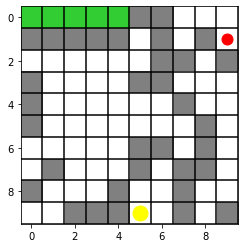

In [169]:
fig, ax = plt.subplots()
env = Environment(ax, n, theta, ucb)
anim = FuncAnimation(fig, env.update, frames = steps, blit = True)
HTML(anim.to_jshtml())